# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | tangier
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | reuleuet
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | cananea
Processing Record 9 of Set 1 | edmundston
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | kidal
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | colonia nicolich
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | vorgashor
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,28.50,77,46,5.53,MH,1722997222
1,puerto natales,-51.7236,-72.4875,-2.15,91,100,1.31,CL,1722997223
2,adamstown,-25.0660,-130.1015,18.70,66,39,5.08,PN,1722997224
3,tangier,35.7806,-5.8137,21.64,100,75,2.06,MA,1722997225
4,northam,51.0333,-4.2167,15.37,94,3,4.21,GB,1722997226


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,28.50,77,46,5.53,MH,1722997222
1,puerto natales,-51.7236,-72.4875,-2.15,91,100,1.31,CL,1722997223
2,adamstown,-25.0660,-130.1015,18.70,66,39,5.08,PN,1722997224
3,tangier,35.7806,-5.8137,21.64,100,75,2.06,MA,1722997225
4,northam,51.0333,-4.2167,15.37,94,3,4.21,GB,1722997226


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

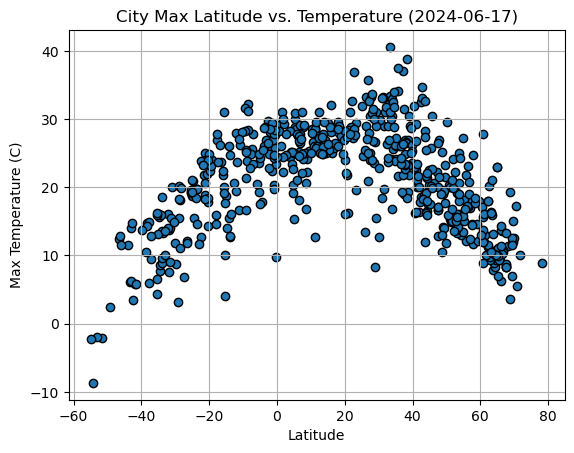

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

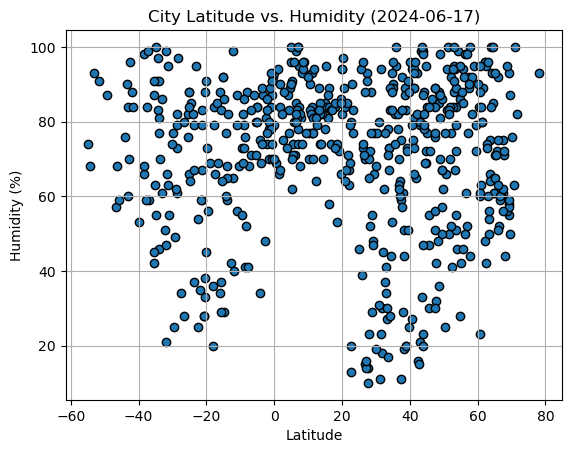

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

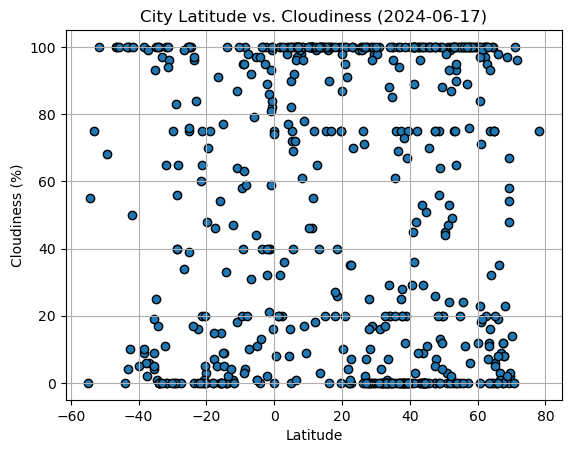

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

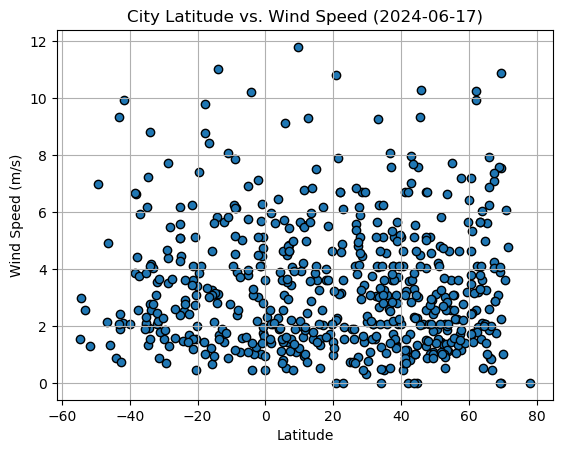

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,28.50,77,46,5.53,MH,1722997222
3,tangier,35.7806,-5.8137,21.64,100,75,2.06,MA,1722997225
4,northam,51.0333,-4.2167,15.37,94,3,4.21,GB,1722997226
5,reuleuet,5.2167,96.2833,28.90,62,72,0.81,ID,1722997228
6,wailua homesteads,22.0669,-159.3780,28.44,67,0,6.69,US,1722997229


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,-2.15,91,100,1.31,CL,1722997223
2,adamstown,-25.0660,-130.1015,18.70,66,39,5.08,PN,1722997224
9,waitangi,-43.9535,-176.5597,11.57,76,0,0.89,NZ,1722997232
13,grytviken,-54.2811,-36.5092,-8.69,68,55,2.99,GS,1722997236
14,west island,-12.1568,96.8225,27.99,65,1,5.66,CC,1722997237


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.442231823249439


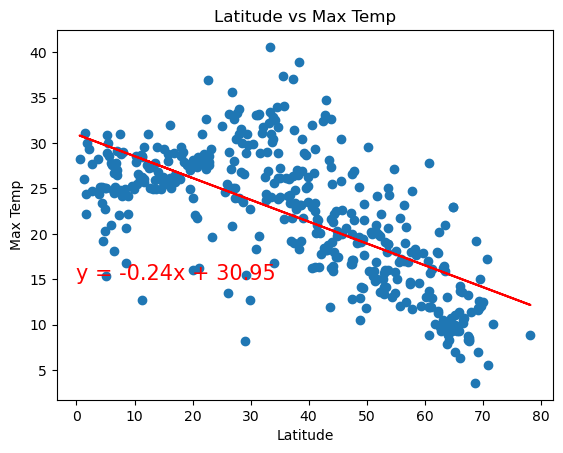

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()





The r^2-value is: 0.6089082685779577


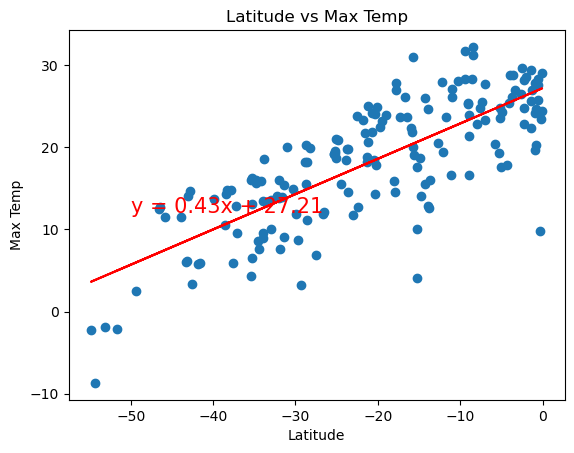

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.011098811194957828


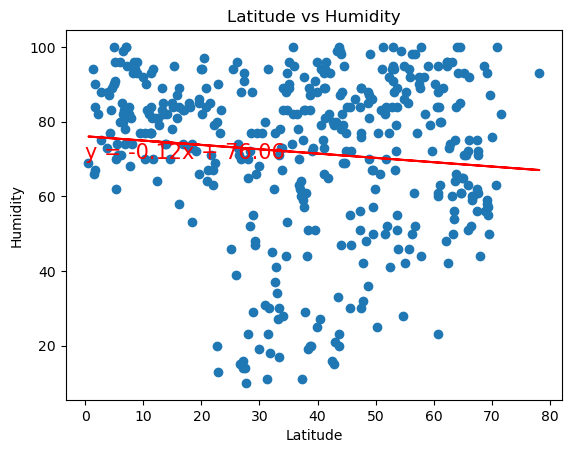

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,70),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0008072911885706422


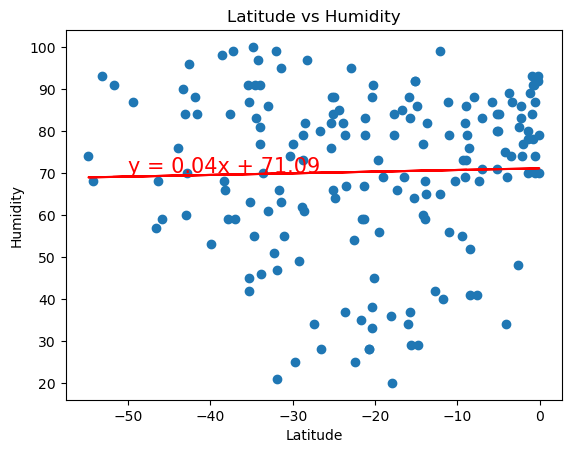

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.029794983220818864


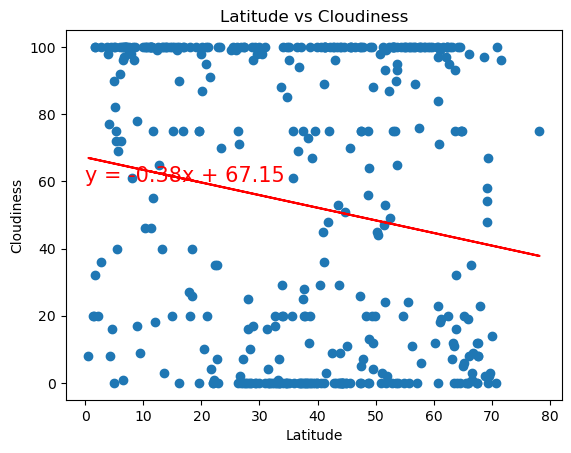

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0004521087670251964


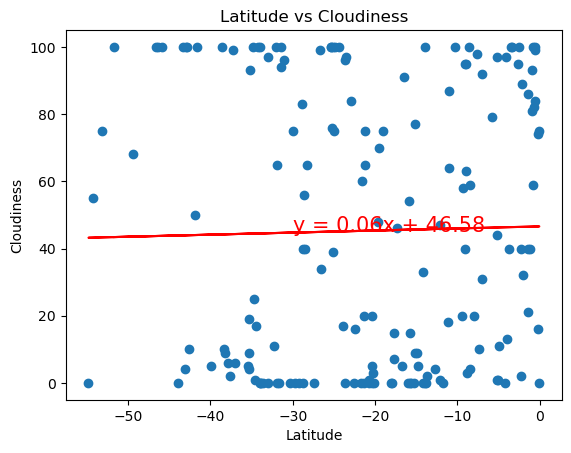

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 3.722429625713181e-05


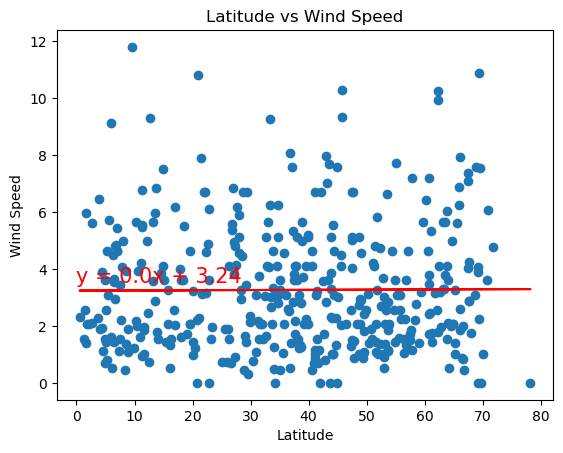

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,3.5),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.000955433582033511


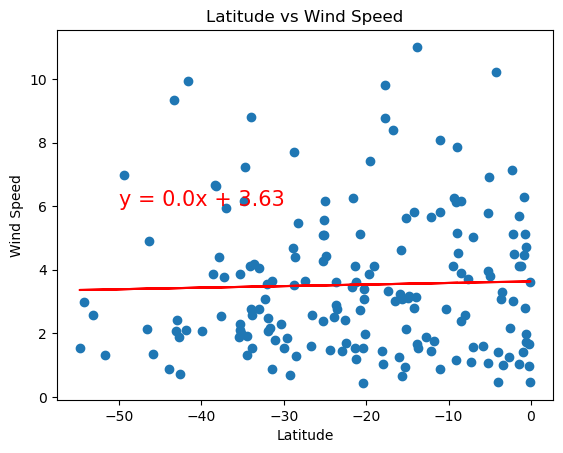

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The r^2-value for the Southern hemisphere Dataframe is: 0.06223904070051575. This implies that r^2-value is quite low.
#This indicates that only about 6.2% of the variance in wind speed can be explained by latitude through this linear regression model. The remaining 93.8% of the variance is unexplained by the model and could be due to other factors or inherent variability in the data.
#A low r^2 value suggests that there is a weak linear relationship between latitude and wind speed. Latitude is not a strong predictor of wind speed based on your data.
